**Задание 4**
  В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.  Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.  Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки), так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.  Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
  Загрузите датасет creditcard.csv и создайте датафрейм df.
  С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.  Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
  pd.options.display.max_columns = 100.
  Просмотрите первые 10 строк датафрейма df.
  Создайте датафрейм X из датафрейма df, исключив столбец Class.
  Создайте объект Series под названием y из столбца Class.
  Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
  У вас должны получиться объекты X_train, X_test, y_train и y_test.
  Просмотрите информацию о их форме.
  Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
  Создайте модель GridSearchCV со следующими аргументами:
  estimator=RandomForestClassifier(random_state=100),
  param_grid=parameters,
  scoring='roc_auc',
  cv=3.
  Обучите модель на тренировочном наборе данных (может занять несколько минут).
  Просмотрите параметры лучшей модели с помощью атрибута best_params_.
  Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
  Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
  Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
pd.options.display.max_columns = 100
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
values = pd.DataFrame(df.value_counts(normalize=True))
values

0
Time     V1         V2         V3        V4        V5        V6        V7         V8         V9        V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21        V22       V23       V24       V25       V26       V27       V28       Amount Class          
163152.0 -1.196037   1.585949   2.883976  3.378471  1.511706  3.717077  0.585362  -0.156001   0.122648  4.217934  1.385525 -0.709405 -0.256168 -1.564352  1.693218 -0.785210 -0.228008 -0.412833  0.234834  1.375790 -0.370294   0.524395 -0.355170 -0.869790 -0.133198  0.327804 -0.035702 -0.858197 7.56   0      0.000063
         -1.203617   1.574009   2.889277  3.381404  1.538663  3.698747  0.560211  -0.150911   0.124136  4.220998  1.384569 -0.706897 -0.256274 -1.562583  1.692915 -0.787338 -0.226776 -0.412354  0.234322  1.385597 -0.366727   0.522223 -0.357329 -0.870174 -0.134166  0.327019 -0.042648 -0.855262 1.51   0      0.000063
43153.0  -2.086016   2.203265   1.654339  2.941050 -1.683045  0.529728 -1.352162   1.793449  -0.723686  0.600365 -0.982212 -0.551636 -1.337000  0.834403  1.251862  0.033455  1.067978  0.160510  0.213087  0.079002  0.216444   0.567241 -0.035345  0.370201  0.157378  0.440341  0.210230  0.090558 0.76   0      0.000032
170731.0  2.033492   0.766969  -2.107555  3.631952  1.348594 -0.499907  0.945159  -0.286392  -1.370581  1.653073 -1.600434 -1.510901 -2.143280  1.189850 -0.875588  0.175808 -0.419433 -0.464717 -1.414528 -0.430560  0.241894   0.658545 -0.102644  0.580535  0.643637  0.347240 -0.116618 -0.078601 0.76   0      0.000032
68207.0  -13.192671  12.785971 -9.906650  3.320337 -4.801176  5.760059 -18.750889 -37.353443 -0.391540 -5.052502  4.406806 -4.610756 -1.909488 -9.072711 -0.226074 -6.211557 -6.248145 -3.149247  0.051576 -3.493050  27.202839 -8.887017  5.303607 -0.639435  0.263203 -0.108877  1.269566  0.939407 1.00   1      0.000021
...                                                                                                                                                                                                                                                                                                                      ...
65149.0  -0.608037   0.277482   2.333740  0.713876 -0.686327  0.424502  0.158410   0.277078   0.005665 -0.574444 -0.383596  0.063757  0.435809 -0.294166  1.561564  0.430549 -0.512260  0.321857 -1.089111  0.192164  0.425425   1.077523  0.095700  0.080007 -0.087784 -0.253436  0.077868  0.055774 115.98 0      0.000004
          0.890428  -0.914533   0.916273  0.533497 -1.417793 -0.283902 -0.520284   0.002223  -1.050330  0.827726  1.336306  0.961705  0.778165  0.101997  0.352339 -0.892199 -0.538873  1.792922 -1.092627 -0.119284 -0.239564  -0.634749 -0.018377  0.482486  0.102384 -0.559266  0.040121  0.067240 192.05 0      0.000004
65150.0  -0.819167   1.289630   1.155617 -0.356589  0.742668 -1.179886  1.114827  -0.105033  -1.169136 -1.218791  1.841286  0.558376  0.081792 -1.028918 -0.400824  0.722658  0.402985  0.613975 -0.605494 -0.014715 -0.011025  -0.125263 -0.385443  0.449483  0.536560  0.252429 -0.020876  0.072608 0.76   0      0.000004
         -0.283939   1.355339   0.553398  0.255501  0.561040 -1.338352  1.056880  -0.229176  -0.738105 -1.157676  0.000759 -0.543236 -0.313497 -1.370815  0.770587  0.452886  1.064176  0.458320 -0.199074 -0.019922 -0.076192  -0.211969 -0.256209  0.259185  0.096589  0.327896  0.021232  0.083294 0.76   0      0.000004
172792.0 -0.533413  -0.189733   0.703337 -0.506271 -0.012546 -0.649617  1.577006  -0.414650   0.486180 -0.915427 -1.040458 -0.031513 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117  0.382948  0.261057   0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649 217.00 0      0.000004

[283726 rows x 1 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
target = 'Class'
y = df[target]
y = pd.Series(y)
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [22]:
X = df.drop(target, axis = 1)

In [23]:
X.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify=y)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 222925 to 271
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85443 entries, 262922 to 198375
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85443 non-null  float64
 1   V1      85443 non-null  float64
 2   V2      85443 non-null  float64
 3   V3      85443 non-null  float64
 4   V4      85443 non-null  float64
 5   V5      85443 non-null  float64
 6   V6      85443 non-null  float64
 7   V7      85443 non-null  float64
 8   V8      85443 non-null  float64
 9   V9      85443 non-null  float64
 10  V10     85443 non-null  float64
 11  V11     85443 non-null  float64
 12  V12     85443 non-null  float64
 13  V13     85443 non-null  float64
 14  V14     85443 non-null  float64
 15  V15     85443 non-null  float64
 16  V16     85443 non-null  float64
 17  V17     85443 non-null  float64
 18  V18     85443 non-null  float64
 19  V19     85443 non-null  float64
 20  V20     85443 non-null  float64
 21  V21     85443 non-null  float

In [28]:
y_train.unique()

array([0, 1], dtype=int64)

In [29]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [30]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
parameters = [{'n_estimators': [10, 15], 
               'max_features': np.arange(3, 5), 
               'max_depth': np.arange(4, 7)}]

In [34]:
model = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                  param_grid=parameters,
                  scoring='roc_auc',
                  cv=3)

In [35]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [36]:
model.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [38]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print('%0.3f (+/-%0.3f) for %r' % (mean, std * 2, params))

0.930 (+/-0.052) for {'max_depth': 4, 'max_features': 3, 'n_estimators': 10}
0.938 (+/-0.061) for {'max_depth': 4, 'max_features': 3, 'n_estimators': 15}
0.941 (+/-0.021) for {'max_depth': 4, 'max_features': 4, 'n_estimators': 10}
0.956 (+/-0.020) for {'max_depth': 4, 'max_features': 4, 'n_estimators': 15}
0.949 (+/-0.057) for {'max_depth': 5, 'max_features': 3, 'n_estimators': 10}
0.949 (+/-0.048) for {'max_depth': 5, 'max_features': 3, 'n_estimators': 15}
0.960 (+/-0.026) for {'max_depth': 5, 'max_features': 4, 'n_estimators': 10}
0.963 (+/-0.026) for {'max_depth': 5, 'max_features': 4, 'n_estimators': 15}
0.955 (+/-0.021) for {'max_depth': 6, 'max_features': 3, 'n_estimators': 10}
0.966 (+/-0.013) for {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}
0.956 (+/-0.011) for {'max_depth': 6, 'max_features': 4, 'n_estimators': 10}
0.960 (+/-0.007) for {'max_depth': 6, 'max_features': 4, 'n_estimators': 15}


In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

In [43]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, y_pred)

array([[85288,     7],
       [   50,    98]], dtype=int64)

In [48]:
# Normalized confusion matrix
cm = confusion_matrix(y_test, y_pred) / y_test.shape[0]
cm

array([[9.98185925e-01, 8.19259623e-05],
       [5.85185445e-04, 1.14696347e-03]])

In [49]:
from sklearn.metrics import precision_score

In [50]:
precision_score(y_test, y_pred)

0.9333333333333333

In [51]:
from sklearn.metrics import recall_score

In [52]:
recall_score(y_test, y_pred)

0.6621621621621622

In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(y_test, y_pred)

0.774703557312253

Text(0, 0.5, 'Количество')

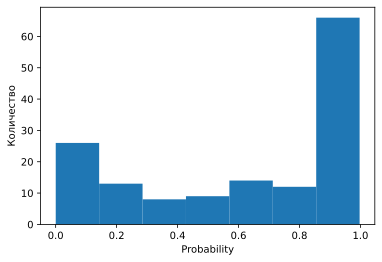

In [55]:
plt.hist(y_pred_proba[y_test == 1], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

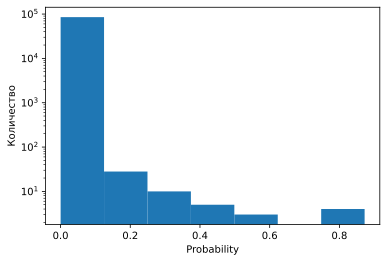

In [61]:
plt.hist(y_pred_proba[y_test == 0], log=True, bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

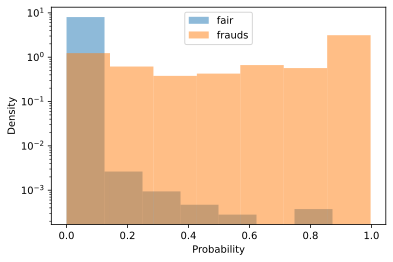

In [73]:
plt.hist(y_pred_proba[y_test == 0], bins = 7, log = True, density = True, alpha = .5)
plt.hist(y_pred_proba[y_test == 1], bins = 7, log=True, density = True, alpha = .5)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(['fair', 'frauds'])

In [74]:
from sklearn.metrics import roc_curve

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label = 1)

In [76]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.17240166e-05, 1.17240166e-05,
       2.34480333e-05, 2.34480333e-05, 2.34480333e-05, 2.34480333e-05,
       3.51720499e-05, 3.51720499e-05, 4.68960666e-05, 4.68960666e-05,
       5.86200832e-05, 5.86200832e-05, 7.03440999e-05, 7.03440999e-05,
       1.17240166e-04, 1.17240166e-04, 1.28964183e-04, 1.28964183e-04,
       1.40688200e-04, 1.40688200e-04, 1.75860250e-04, 1.75860250e-04,
       2.11032300e-04, 2.11032300e-04, 2.34480333e-04, 2.34480333e-04,
       2.57928366e-04, 2.57928366e-04, 2.69652383e-04, 3.39996483e-04,
       3.51720499e-04, 3.51720499e-04, 3.75168533e-04, 3.75168533e-04,
       3.98616566e-04, 3.98616566e-04, 4.10340583e-04, 4.10340583e-04,
      

In [77]:
tpr

array([0.        , 0.00675676, 0.02027027, 0.02702703, 0.04054054,
       0.08108108, 0.10135135, 0.16891892, 0.18918919, 0.23648649,
       0.25      , 0.26351351, 0.27702703, 0.28378378, 0.2972973 ,
       0.31756757, 0.33108108, 0.40540541, 0.40540541, 0.43243243,
       0.43918919, 0.4527027 , 0.46621622, 0.5       , 0.5       ,
       0.50675676, 0.50675676, 0.57432432, 0.57432432, 0.62162162,
       0.62162162, 0.66216216, 0.66216216, 0.67567568, 0.67567568,
       0.7027027 , 0.7027027 , 0.72297297, 0.72297297, 0.73648649,
       0.73648649, 0.74324324, 0.74324324, 0.75      , 0.75      ,
       0.76351351, 0.76351351, 0.76351351, 0.76351351, 0.77027027,
       0.77027027, 0.77702703, 0.77702703, 0.78378378, 0.78378378,
       0.7972973 , 0.7972973 , 0.80405405, 0.80405405, 0.81081081,
       0.81081081, 0.81756757, 0.81756757, 0.82432432, 0.82432432,
       0.83108108, 0.83108108, 0.83108108, 0.83108108, 0.83108108,
       0.83108108, 0.83108108, 0.83108108, 0.83783784, 0.83783

In [78]:
thresholds

array([1.99730904e+00, 9.97309041e-01, 9.96825397e-01, 9.95793889e-01,
       9.94278738e-01, 9.83520994e-01, 9.80346390e-01, 9.57873563e-01,
       9.57079156e-01, 9.42460556e-01, 9.38561896e-01, 9.33762057e-01,
       9.30140485e-01, 9.29423366e-01, 9.28625334e-01, 9.13388502e-01,
       9.05379881e-01, 8.78236879e-01, 8.72338642e-01, 8.58152033e-01,
       8.58097475e-01, 8.29450140e-01, 8.15793889e-01, 7.86362154e-01,
       7.82786983e-01, 7.55699508e-01, 7.54583009e-01, 6.42367669e-01,
       6.22912226e-01, 5.75473654e-01, 5.56843575e-01, 5.14046873e-01,
       4.70386974e-01, 4.43090323e-01, 4.36502226e-01, 3.87216511e-01,
       3.84450228e-01, 3.33553538e-01, 3.15723788e-01, 3.05298304e-01,
       2.68435000e-01, 2.67573587e-01, 2.59491430e-01, 2.56055302e-01,
       2.52096091e-01, 2.46217120e-01, 2.37653800e-01, 2.36358860e-01,
       2.31513287e-01, 2.31257633e-01, 2.18149388e-01, 2.16954080e-01,
       2.09243005e-01, 2.02864755e-01, 2.00803304e-01, 1.98838523e-01,
      

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

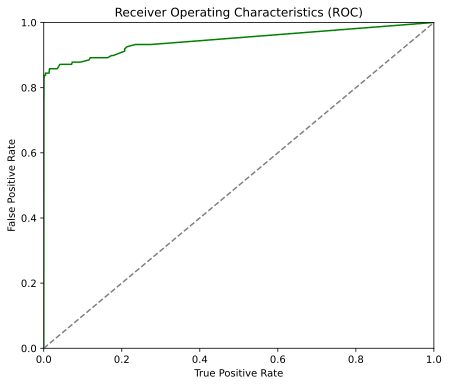

In [79]:
rcParams['figure.figsize'] = 7, 6
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')

In [85]:
# Оценка точности предсказаний на тест - данных:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [86]:
# Оценка точности на тренировочном саб-сете:
roc_auc_score(model.predict(X_train), y_train)

0.990041341984959